## Práctica 3 - Optimización No Lineal

## Pablo Clemente Moreno <br> No. Cuenta: 418125805

## 1. Al buscar el minimo de: $f(x) = (x_{1}^{2} + (x_{2} +1)^{2})(x_{1}^{2} + (x_{2} -1)^{2})$
Se obtienen los puntos siguientes:<br>
$x^{(1)} = [1,1]^{T}$<br>
$x^{(2)} = [0,1]^{T}$<br>
Caracterice cada uno de estos puntos y muestre todo su procedimiento.

### Condiciones necesarias (gradiente f(x)=0):

Paso 1. Derivar f(x) respecto de $x_1$ y $x_2$<br>
a) $f'(x)$ respecto a $x_1$ = $2x_{1}(x_{1}^{2} + (x_{2} - 1)^{2}) + 2x_{1}(x_{1}^{2} + (x_{2} + 1)^{2})$<br>
b) $f'(x)$ respecto a $x_2$= $2(x_{2} + 1)(x_{1}^{2} + (x_{2} - 1)^{2})) + 2(x_{2}-1)(x_{1}^{2} + (x_{2} + 1)^{2})$

Paso 2. evaluar $x^{(1)}$ y $x^{(2)}$ en la $f'(x)$ de a y b:<br>
$f'([1,1]) = [ 2 + 10, 4 + 0 ] = [12,4]$<br>
$f'([0,1]) = [0+ 0, 0+0] = [0,0]$<br>
#### Ya que el punto $x^{(1)}$ no cumple con las condiciones necesarias, solo pasaremos a verificar las condiciones suficientes para el punto $x^{(2)}$

### Condiciones suficientes (matríz hessiana positivamente definida):

Paso 1. Calcular f''(x) respecto de $x_1$ y $x_2$ para a y b <br>

$f''(a)$ respecto a $x_1$ = $2(x_{1}^{2}+(x_{2}-1)^{2})+2x_{1}(2x_{1})+2(x_{1}^{2}+(x_{2}+1)^{2})+2x_{1}(2x_{1})$ ,  respecto a $x_2$ = $2x_{1}(2(x_{2} -1)) + 2x_{1}(2(x_{2}+1))$

$f''(b)$ respecto a $x_1$ =$2(x_{2}+1)(2x_{1})+ 2(x_{2} -1)(2x_{1})$ ,  respecto a $x_2$ = $ 2(x_{2} +1)(2(x_{2}-1))+ 2(x_{1}^{2} + (x_{2} -1)^{2}) + 2(x_{2} -1)(2(x_{2}+1))+ 2(x_{1}^{2} + (x_{2} +1)^{2})$

Paso 2. evaluar $x^{(2)}$ en la $f''(a)$ y $f''(b)$ <br>

$f''([0,1]) = \begin{bmatrix}
0+0+8+0&0+0 \\ 
0+0&0+0+0+8 
\end{bmatrix}=\begin{bmatrix}
8&0 \\ 
0&8
\end{bmatrix}$<br>

Resultado: 
- la matríz hessiana en el punto $x^{(2)}$ esta positivamente definida por lo tanto $x^{(2)}$ __si es un mínimo__.<br>

## 2. Se desea minimizar la funcion: $f(x): (x_{1}^{2} - x_{2})^{2} + x_{2}^{2}$

In [105]:
def f(x):
    return (x[0]**2 -x[1])**2 + x[1]**2

Se reescribe la función objetivo multi-variable en terminos de lambda:

In [106]:
def flambda(x, d, l):
    xlambda = []
    xlambda.append(x[0] + l*d[0])
    xlambda.append(x[1] + l*d[1])
    fl = f(xlambda)
    return fl

In [107]:
def fl(x, d, w, a, b):
    l = (b-a)*w + a
    return flambda(x,d,l)

Posteriormente, podemos usar alguno de los métodos de optimización para funciones de una sola variable.<br>
En este caso usamos el método de __Seccion Dorada__.

In [108]:
def seccionDorada(x, d, a,b,eps):
    e = eps/(b-a)
    aw = 0
    bw = 1
    lw = 1
    while lw > e:
        w1 = aw +(0.618*lw)
        w2 = bw -(0.618*lw)
        f1 = fl(x, d, w1, a, b) 
        f2 = fl(x, d, w2, a, b) 
        if  f1 < f2:
            aw = w2 
        else:
            bw = w1
        lw = bw - aw   

        lopt = (((b-a)*bw + a)+((b-a)*aw + a))/2.0
    return lopt

In [109]:
x0 = [-5,5]
s = [2,1]
a, b, eps_uni = -100.0, 100.0, 0.0001
l = seccionDorada(x0, s, a, b, eps_uni)
xnew= [x0[i] + l*s[i] for i in range(2)]

print('siguiente punto = [%.3f,%.3f]'%(xnew[0],xnew[1]))
print('f(x) = %.3f'%(f(xnew)))

siguiente punto = [-2.597,6.201]
f(x) = 38.753


## Grafica de f(x):

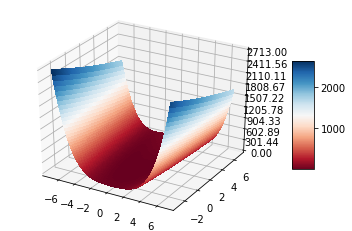

In [110]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

x1 = arange(-7.0,7.0,0.1)
x2 = arange(-3.0,7.0,0.1)
X1,X2 = meshgrid(x1, x2) # grid of point
Z = f([X1,X2]) # evaluation of the function on the grid

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Grafica de f(x) en terminos de lambda: $f(x): ((-5 + 2\lambda)^{2} - (5 + \lambda))^{2}+ (5 + \lambda)^{2}$

In [111]:
def f_lambda(l):
    return ((-5 + 2*l)**2 -(5 + l))**2 + (5+l)**2

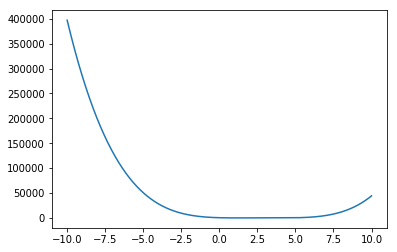

In [113]:
import matplotlib.pyplot as plt
import numpy as np
l = np.linspace(-10.0, 10.0, num=1000)
plt.plot(l, [abs(f_lambda(i)) for i in l])
plt.show()

## 3. Considere el siguiente problema: $min f(x): (x_{1} + 2x_{2} - 7)^{2}+(2x_{1} +x_{2} -5)^{2}$

In [136]:
import math
import random

In [137]:
num_eval = 0
def f(x):
    global num_eval 
    num_eval += 1
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] -5)**2

In [138]:
def norm(x):
    suma = sum([i**2 for i in x])
    return math.sqrt(suma)

# EVOP

In [13]:
def generar_vertices(x, delta, lista_binarios):
    lista_puntos = []
    for binario in lista_binarios:
        punto = []
        for i in range(len(delta)):
            if binario[i] == 1:
                punto.append(x[i] + delta[i]/2)
            else:
                punto.append(x[i] - delta[i]/2)
        lista_puntos.append(punto)
    return lista_puntos

def encontrar_menor(lista_vertices):
    lista_f = [f(i) for i in lista_vertices]
    f_min = min(lista_f)
    index = lista_f.index(f_min)
    x_min = lista_vertices[index]
    return x_min, f_min

In [14]:
def evop(x0,delta,eps):
    lista_binarios = [[0,0],[0,1],[1,0],[1,1]]
    x_bar = x0
    f_xbar = f(x_bar)
    while norm(delta) > eps:
        lista_vertices = generar_vertices(x_bar, delta, lista_binarios)
        x0, f_x  = encontrar_menor(lista_vertices)
        if f_x < f_xbar:
            x_bar = x0
            f_xbar = f_x
        else:
            delta = [i/2 for i in delta]

    print('x = [%.3f,%.3f]'%(x_bar[0],x_bar[1]))
    print('f(x) = %.3f'%(f_xbar))
    print(num_eval)

In [15]:
x0 = [0,0]
delta = [5,5]
eps = 0.001
evop(x0,delta,eps)

x = [1.000,3.000]
f(x) = 0.000
105


# Caminata Aleatoria

In [17]:
def obtenerR(x):
    R=0
    n = len(x)
    for i in range(n):
        R += x[i]**2
    return R**0.5

In [18]:
def caminata_aletoria(n,x0,Lambda,eps,N):
    intentos = 0
    fx = f(x0)
    while Lambda > eps:
        while True:
            r = []
            for i in range(n):
                x= random.uniform(-1,1)
                r.append(x)
            R = obtenerR(r)
            if R < 1:
                break
        u = [(1/R)*i for i in r]
        Lambda_u = [Lambda*i for i in u]
        xnew = [x + y for x, y in zip(x0, Lambda_u)]
        fxnew = f(xnew)
        if fxnew < fx:
            x0 = xnew
            fx = fxnew
            intentos = 0
        else:
            intentos+=1
            if intentos >= N:
                Lambda = Lambda/2
    
    print('x = [%.3f,%.3f]'%(x0[0],x0[1]))
    print('f(x) = %.3f'%(fx))
    print(num_eval)

In [19]:
n = 2
x0 = [0,0]
Lambda = 2.0
eps = 0.05
N = 100
random.seed(42)
caminata_aletoria(n,x0,Lambda,eps,N)

x = [0.953,3.037]
f(x) = 0.004
267


# Simplex

In [21]:
def simplexInicial(x0,n, alpha):
    rho1 = (((n + 1)**0.5 + n - 1)/(n*(2**0.5)))*alpha
    rho2 = (((n + 1)**0.5 - 1)/(n*(2**0.5)))*alpha
    simplex = []
    simplex.append((x0,f(x0)))
    for i in range(n):
        x = [0] * n
        for j in range(n):
            if j == i:
                x[j] = x0[j] + rho1
            else:
                x[j] = x0[j] + rho2
        simplex.append((x,f(x)))  
    return simplex

In [22]:
def centroide(simplex):
    npts = len(simplex)
    xc = [0]*(npts-1)
    for i in range(npts-1):
        xc = [x + y for x, y in zip(xc, simplex[i][0])] #esta linea me costo un huevo
    return  [(1.0/(npts-1))*i for i in xc]

In [23]:
def Q(simplex, xc):
    npts = len(simplex)
    Q = 0
    fxc = f(xc)
    for i in range(npts):
        Q += (simplex[i][1]-fxc)**2
    Q = (Q/npts)**0.5
    return Q

In [24]:
def simplex(n,x0,gamma,beta,eps,alpha):
    s = simplexInicial(x0, n, alpha)
    while True:
        s = sorted(s,key = lambda x: x[1] )
        xc = centroide(s)
        aux = [2*i for i in xc]
        aux1 = s[-1][0]
        xr = []
        for i in range(len(aux)):
            xr.append(aux[i] - aux1[i])
        fxr = f(xr)
        xnew = xr
        fxnew = fxr
        if fxr < s[0][1]:
            aux2 = [(1.0 + gamma)*i for i in xc]
            aux3 = [i*gamma for i in s[-1][0]]
            xnew= []
            for i in range(len(aux2)):
                xnew.append(aux2[i]-aux3[i])
            fxnew = f(xnew)
        elif fxr >= s[-1][1]:
            aux4 = [(1.0 - beta)*i for i in xc]
            aux5 = [i*beta for i in s[-1][0]]
            xnew= []
            for i in range(len(aux4)):
                xnew.append(aux4[i]+aux5[i])
            fxnew = f(xnew)
        elif s[-2][1] < fxr < s[-1][1]:
            aux6 = [(1.0 + beta)*i for i in xc]
            aux7 = [i*beta for i in s[-1][0]]
            xnew= []
            for i in range(len(aux6)):
                xnew.append(aux6[i]-aux7[i])
            fxnew = f(xnew)
        s.pop()
        s.append((xnew,fxnew))
        q = Q(s,xc)
        if q < eps:
            break
    
    simplex_final = sorted(s,key = lambda x: x[1] )
    x = simplex_final[0][0]
    fx = simplex_final[0][1]
    print('x = [%.3f,%.3f]'%(x[0],x[1]))
    print('f(x) = %.3f'%(fx))
    print(num_eval)

In [25]:
n = 2
x0= [0,0]
gamma = 1.5
beta = 0.5
eps = 0.001
alpha= 5
simplex(n,x0,gamma,beta,eps,alpha)

x = [1.010,2.999]
f(x) = 0.000
54


# Hooke-Jeeves

In [26]:
def exploratorio(x, delta):
    xa = x.copy()
    fa = f(xa)
    for i in range(len(x)):
            xamas = xa.copy()
            xamas[i] += delta[i]
            xamenos = xa.copy()
            xamenos[i] -= delta[i]
            fxamas = f(xamas)
            fxamenos = f(xamenos)
            faux = [[fa, xa], [fxamas, xamas], [fxamenos, xamenos]]
            faux.sort()
            xa = faux[0][1].copy() 
            fa = faux[0][0]
    if xa == x:
        aux = False #fracaso
    else:
        aux = True #exito
    return xa, fa, aux

In [27]:
def hook_jeeves(x0,delta,alpha,eps):
    k=0
    x = x0
    xk = x0
    while norm(delta) > eps:
        xaux, faux, aux = exploratorio(x, delta)
        if aux == True:
            xk1 = xaux
            fxk1 = faux
            break
        else:
            delta = [i/alpha for i in delta]
    xmenos = x 
    xk = xk1 
    fxk = fxk1
    while norm(delta) > eps:
        k += 1
        xp = [xk[i] + (xk[i] - xmenos[i]) for i in range(len(xk))]
        xk1, f_xk1, aux_ = exploratorio(xp, delta)
        if f_xk1 >= fxk:
            delta = [i/alpha for i in delta]
            while norm(delta) > eps:
                xaux, faux, aux1 = exploratorio(xk, delta)
                if aux1 == True:
                    xk1 = xaux
                    f_xk1 = faux
                    break
                else:
                    delta = [i/alpha for i in delta]
        xmenos = xk
        xk = xk1
        fxk = f_xk1
    finales = [[f_xk1,xk1],[fxk,xk]]
    finales.sort()
    x_opt = finales[0][1]
    f_opt = finales[0][0]                
    print('x = [%.3f,%.3f]'%(x_opt[0],x_opt[1]))
    print('f(x) = %.3f'%(f_opt))

In [28]:
x0= [0,0]
delta = [5,5]
eps = 0.001
alpha= 2
hook_jeeves(x0,delta,alpha,eps)

x = [0.999,3.002]
f(x) = 0.000


# Powell

In [121]:
def flambda(x, d, l):
    xlambda = []
    xlambda.append(x[0] + l*d[0])
    xlambda.append(x[1] + l*d[1])
    fl = f(xlambda)
    return fl

In [122]:
def fl(x, d, w, a, b):
    l = (b-a)*w + a
    return flambda(x,d,l)

In [123]:
def seccionDorada(x, d, a,b,eps):
    e = eps/(b-a)
    aw = 0
    bw = 1
    lw = 1
    while lw > e:
        w1 = aw +(0.618*lw)
        w2 = bw -(0.618*lw)
        f1 = fl(x, d, w1, a, b) 
        f2 = fl(x, d, w2, a, b) 
        if  f1 < f2:
            aw = w2 
        else:
            bw = w1
        lw = bw - aw   

        lopt = (((b-a)*bw + a)+((b-a)*aw + a))/2.0
    return lopt

In [124]:
def determinante(A):
    a = A[0][0]
    b = A[0][1]
    c = A[1][0]
    d = A[1][1]
    return (a*d)-(b*c)

In [131]:
def powell(n,s1,s2,x0,eps):
    s=[s1,s2]
    a, b, eps_uni = -10.0, 10.0, 0.001
    points = [x0]
    
    while True:
        l = seccionDorada(points[-1], s[-1], a, b, eps_uni)
        xnew= [points[-1][i] + l*s[-1][i] for i in range(n)]
        points.append(xnew)
        for si in s:
            l = seccionDorada(points[-1], si, a, b, eps_uni)
            xnew= [points[-1][i] + l*si[i] for i in range(n)]
            points.append(xnew)

        d = [points[-1][i] - points[1][i] for i in range(n)]
        aux = np.linalg.norm(np.array(d))
        s.pop(0)
        s.append([d[i] / aux for i in range(n)])
        #lin_indep = determinante(s)
        A = np.transpose(np.matrix(s))
        lin_indep = np.linalg.det(A)

        if aux < eps or lin_indep == 0:
            break
            
        points = [0, points[-1]]
    opt = points[-1]
    print('x = [%.3f,%.3f]'%(opt[0],opt[1]))
    print("f(x) = %.3f"%(f(points[-1])))

In [139]:
n = 2
x0 = [0,0]
eps = 0.001
s1 = [1.0,0]
s2 = [0,1.0]
powell(n,s1,s2,x0,eps)

x = [1.000,3.000]
f(x) = 0.000


Método | Punto optimo | f(x) | Evaluaciones
-- | -- | -- | --
EVOP |[1.000,3.000] | 0.0| 105
Caminata Aleatoria |[0.953,3.037]|0.004| 267
Simplex| [1.010,2.999]|0.0| __54__
Hooke-Jeeves |[0.999,3.002]|0.0| -
Powell |[1.000,3.000]|0.0| -

## ¿El punto encontrado por los métodos es un mínimo? Justifica tu respuesta.

$f(x): (x_{1} + 2x_{2} - 7)^{2}+(2x_{1} +x_{2} -5)^{2}$

### Condiciones necesarias (gradiente f(x)=0):

Paso 1. Derivar f(x) respecto de $x_1$ y $x_2$<br>
a) $f'(x)$ respecto a $x_1$ = $4(2x_{1} + x_{2} - 5)+ 2(x_{1} + 2x_{2} - 7) $<br>
b) $f'(x)$ respecto a $x_2$= $4(2x_{2} + x_{1} - 7)+ 2(x_{2} + 2x_{1} - 5) $

Paso 2. evaluar el punto encontrado en la $f'(x)$ de a y b:<br>
$f'([1,3]) = [ 0+0, 0+0 ] = [0,0]$<br>

### Condiciones suficientes (matríz hessiana positivamente definida):

Paso 1. Calcular f''(x) respecto de $x_1$ y $x_2$ para a y b <br>

$f''(a)$ respecto a $x_1$ = $4(2) + 2(1)=$ 10 ,  respecto a $x_2$ = $4(1) + 2(2)$ = 8

$f''(b)$ respecto a $x_1$ = $4(1) + 2(2)$ =8 ,  respecto a $x_2$ = $4(2) + 2(1)=$ = 10

matríz hessiana $=\begin{bmatrix}
10&8 \\ 
8&10
\end{bmatrix}$<br>

In [35]:
A = [[10,8],[8,10]]
determinante(A)

36

Resultado: 
- el punto $[1,3]$ cumple con la condición necesaria ($\nabla f(x) = 0$) y la matríz hessiana esta positivamente definida (determinante $\neq 0$) por lo tanto __si es un mínimo__.<br>

## Gráficar f(x), en un intervalo que contenga al optimo.

## Contour plot:

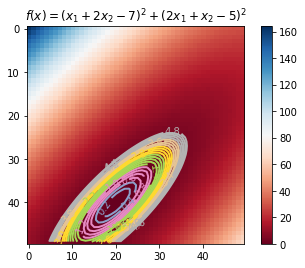

In [36]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def func(x1,x2):
    return (x1 + 2*x2 - 7)**2 + (2*x1 + x2 -5)**2

x1 = arange(-1.0,4.0,0.1)
x2 = arange(-1.0,4.0,0.1)
X1,X2 = meshgrid(x1, x2) # grid of point
Z = func(X1, X2) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-2,5.0,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$f(x)= (x_{1} + 2x_{2} - 7)^{2}+(2x_{1} +x_{2} -5)^{2}$')
show()

## 3D plot:

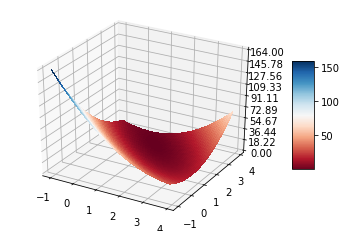

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## 4. Considere el siguiente problema: $min f(x_{1},x_{2})= (1.5 - x_{1}(1-x_{2}))^{2} + (2.25 - x_{1}(1-x_{2}^{2}))^{2} +  (2.625 - x_{1}(1-x_{2}^{3}))^{2} $
Utiliza el método que desees, indica los parámetros que utilizaste y explica por qué elegiste dicho método y cómo elegiste los parámetros de entrada.

Utilize el método de __powell__ porque el método funciona aún cuando la función a optimizarse no sea cuadrática y realiza busquedas unidireccionales (Seccion Dorada) lo que acelera la busqueda y nos asegura encontrar el óptimo.

In [141]:
num_eval = 0
def f(x):
    global num_eval 
    num_eval += 1
    return (1.5 - x[0]*(1 - x[1]))**2 + (2.25 - x[0]*(1 - x[1]**2))**2 + (2.625 - x[0]*(1 - x[1]**3))**2  

In [142]:
#numero de varibles
n = 2
x0 = [1,1]
eps = 0.001
#se utilizan los vetores unitarios para generar las direcciones conjugadas apartir de x0
s1 = [1.0,0]
s2 = [0,1.0]
powell(n,s1,s2,x0,eps)

x = [2.918,0.480]
f(x) = 0.001


In [40]:
gamma = 1.5
beta = 0.5
alpha= 2
simplex(n,x0,gamma,beta,eps,alpha)

x = [3.017,0.505]
f(x) = 0.000
520


In [42]:
delta = [5,5]
evop(x0,delta,eps)

x = [-2.767,1.279]
f(x) = 0.928
5965
